# Homework 1

## Jingheng Huan
Netid: jh730

In [65]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline

## 1) Invert a region of interest
**(2 points)**

**a)** Load the astronaut.png image into Fiji and determine the coordinates of a box containing the space shuttle (in the upper right background of the image) by selecting it with the rectangle tool. Observe that Fiji assigns the first coordinate to columns and the second one to rows; numpy does the reverse. Write down the coordinates as variables. (*0.5 points*) 

**b)** Load astronaut.png as a B&W image into a notebook cell and cut out an ROI (region of interest) only containing the space shuttle. Invert the image of the space shuttle (i.e. map the grayvalues interval [0, 1]  to the intervall [1, 0]), then display the original and the inverted ROI next to each other. (*1 point*) 
 
 
**c)** Copy the inverted space shuttle back into the B&W image and display the modified image. (*0.5 points*)  

**ANSWER**

# (a)
The coordinates of the four corners of the space shuttle image are:
upper left: (352, 1)
upper right: (475, 1)
lower left: (352, 285)
lower right: (475, 285)

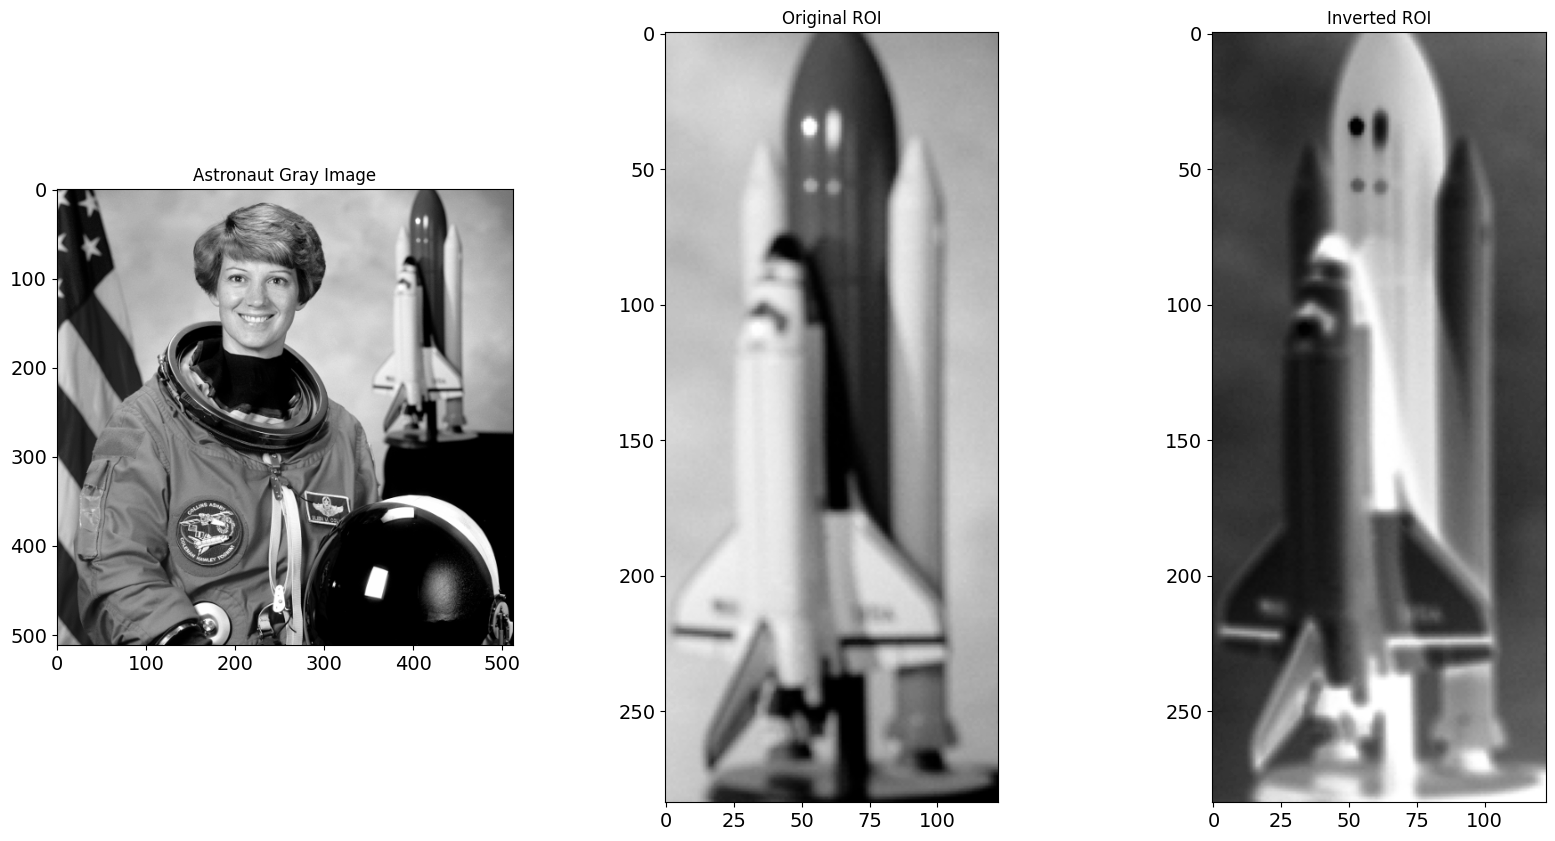

In [66]:
# (b) B&W + ROI + Invert_ROI
from skimage import color, io
astronaut_color = io.imread('astronaut.png')
astronaut_gray = color.rgb2gray(astronaut_color)

x1, x2, y1, y2 = 352, 475, 1, 285
roi = astronaut_gray[y1:y2, x1:x2]
roi_inverted = 1 - roi
astronaut_modified = astronaut_gray.copy()
astronaut_modified[y1:y2, x1:x2] = roi_inverted

fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title('Astronaut Gray Image')
axes[0].axis('on')

axes[1].imshow(roi, cmap='gray')
axes[1].set_title('Original ROI')
axes[1].axis('on')

axes[2].imshow(roi_inverted, cmap='gray')
axes[2].set_title('Inverted ROI')
axes[2].axis('on')
plt.show()

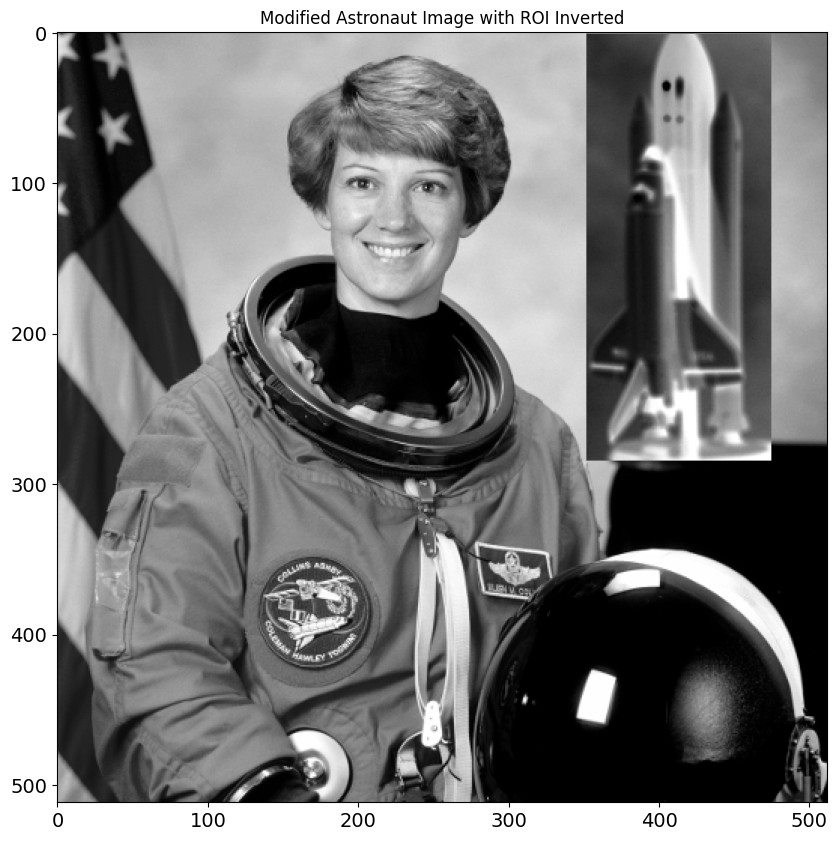

In [67]:
# (c)
plt.figure(figsize=(10, 10))
plt.imshow(astronaut_modified, cmap='gray')
plt.title('Modified Astronaut Image with ROI Inverted')
plt.axis('on')
plt.show()

## 2) Visualize JPEG loss
**(2 points)**

Load astronaut.png and then save it twice as JPEG file (ending: .jpg) and as TIFF file (ending: .tif) (*0.5 point*). 
Load the JPEG and the TIFF file again from disk and convert all three images to B&W. (*0.5 point*) 

Compute the gray value difference between a) PNG and JPEG and b) PNG and TIFF. Display the *absolute values* of these difference images with colorbars. (*1 point*)  

**ANSWER**

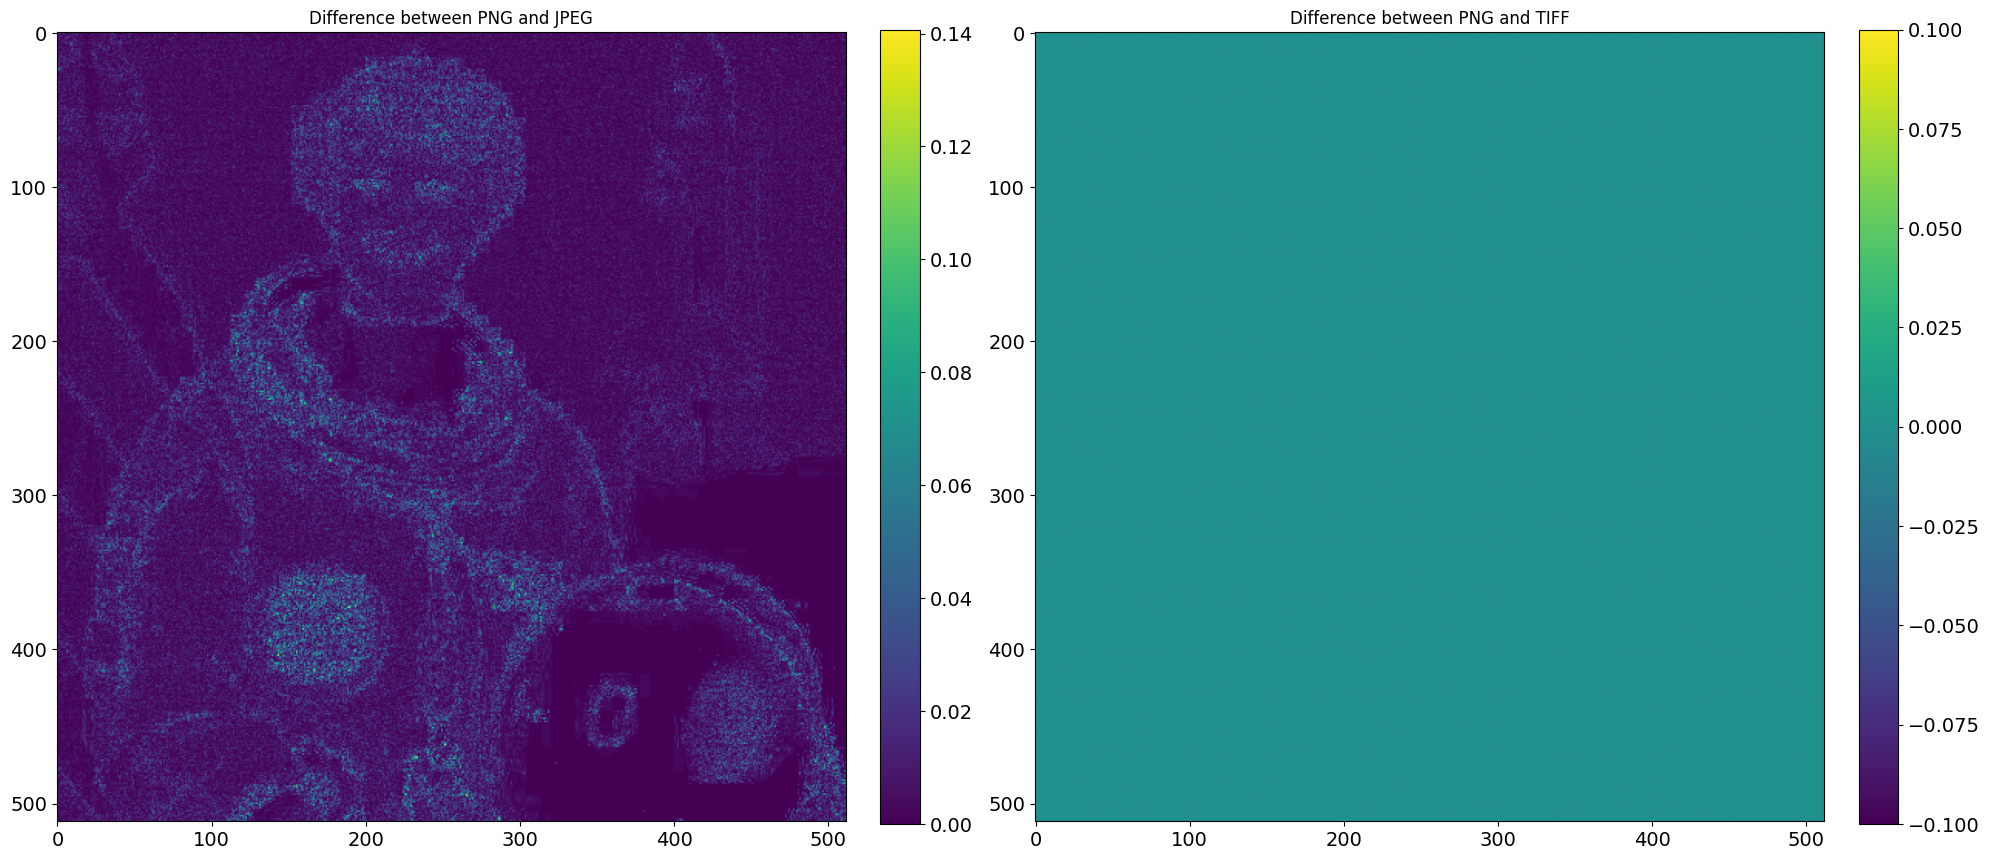

In [68]:
from skimage import img_as_ubyte
from io import BytesIO

astronaut_ubyte = img_as_ubyte(astronaut_color)

buffer_jpeg = BytesIO()
buffer_tiff = BytesIO()

io.imsave(buffer_jpeg, astronaut_ubyte, plugin='pil', format_str='jpeg')
io.imsave(buffer_tiff, astronaut_ubyte, plugin='pil', format_str='tiff')

buffer_jpeg.seek(0)
buffer_tiff.seek(0)

with open('astronaut.jpg', 'wb') as f:
    f.write(buffer_jpeg.read())

with open('astronaut.tiff', 'wb') as f:
    f.write(buffer_tiff.read())

buffer_jpeg.close()
buffer_tiff.close()

astronaut_jpeg = io.imread('astronaut.jpg')
astronaut_tiff = io.imread('astronaut.tiff')

astronaut_gray_jpeg = color.rgb2gray(astronaut_jpeg)
astronaut_gray_tiff = color.rgb2gray(astronaut_tiff)

diff_jpeg = np.abs(astronaut_gray - astronaut_gray_jpeg)
diff_tiff = np.abs(astronaut_gray - astronaut_gray_tiff)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
cmap = 'viridis'

im0 = axes[0].imshow(diff_jpeg, cmap=cmap)
axes[0].set_title('Difference between PNG and JPEG')
axes[0].axis('on')
fig.colorbar(im0, ax=axes[0], fraction = 0.046, pad = 0.04)

im1 = axes[1].imshow(diff_tiff, cmap=cmap)
axes[1].set_title('Difference between PNG and TIFF')
axes[1].axis('on')
fig.colorbar(im1, ax=axes[1], fraction = 0.046, pad = 0.04)

plt.tight_layout()
plt.show()


## 3) The influence of saturation in HSV
**(2 points)**

Load flower.tif, convert it into the HSV colorspace. Create two new images where you set the saturation of all pixels to a) zero and b) one. Display the resulting images. (*1 point*) 

Explain your results in two sentences. (*1 point*)

**ANSWER**

## 4) White balance
**(3 points)**

Find out how the white balance (sometimes also called color balance) in your camera is controlled. It will have several options such as daylight, incandescent, fluorescent ... and will most likely be set to auto. The purpose of this control is to compensate the influence of the spectral composition of the light illuminating the the scene you are about to photograph.

Take two images of the same scene (should be well iluminated and contain a variety of colors). One image should be taken using the daylight option and one image with any of the other options. Save them (JPEG is fine here) and load them into your notebook. Display the two images in the notebook. (*1 point*) 

If your camera does not have a manual choice for the white balance, install another camera app on your smartphone (on Android, Camera Zoom FX works nicely. Don't forget to switch your camera back to auto afterwards; even if not perfect it will normally make a good guess which option to use.

Separate both images in their RGB components. Create three figures where each one is comparing the histogram curves of one color channel in both images. (*1 point*) 

Both images were taken with light of roughly the same color distribution. Therefore, the differences in the histograms indicate what the camera assumes it needs to do in order to compensate for the differences in the spectra of the light sources. 

Describe qualitatively and in not more than three sentences *how* the camera thinks that the spectrum of daylight is differnt than the spectrum of your second choice light source.  

**ANSWER**